# <font color="#555555" size="9">**Desafio Ciência de Dados**</font>


## Desafio

Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).

Entregas

1.	Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!

2.	Responda também às seguintes perguntas:
a.	Qual filme você recomendaria para uma pessoa que você não conhece?

b.	Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

c.	Quais insights podem ser tirados com a coluna Overview?
 É possível inferir o gênero do filme a partir dessa coluna?

3.	Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê?
Qual tipo de problema estamos resolvendo (regressão, classificação)?
Qual modelo melhor se aproxima dos dados e quais seus prós e contras?
Qual medida de performance do modelo foi escolhida e por quê?

4.	Supondo um filme com as seguintes características:

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}


Qual seria a nota do IMDB?

5.	Salve o modelo desenvolvido no formato .pkl.

6.	A entrega deve ser feita através de um repositório de código público que contenha:
a.	README explicando como instalar e executar o projeto
b.	Arquivo de requisitos com todos os pacotes utilizados e suas versões
c.	Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
d.	Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
e.	Arquivo .pkl conforme passo 5 acima.
Todos os códigos produzidos devem seguir as boas práticas de codificação.


#**Variáveis:**


● **Series_Title** – Nome do filme

● **Released_Year** - Ano de lançamento

● **Certificate** - Classificação etária

● **Runtime** – Tempo de duração

● **Genre** - Gênero

● **IMDB_Rating** - Nota do IMDB

● **Overview** - Overview do filme

● **Meta_score** - Média ponderada de todas as críticas

● **Director** – Diretor

● **Star1** - Ator/atriz #1

● **Star2** - Ator/atriz #2

● **Star3** - Ator/atriz #3

● **Star** - Ator/atriz #4

● **No_of_Votes** - Número de votos

● **Gross** - Faturamento


In [ ]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

# Leitura dos dados e carregamento
!pip install gdown
import gdown  # importar a biblioteca gdown para baixar arquivos do Google Drive

# url do arquivo no Google Drive
url = 'https://drive.google.com/uc?id=1SFaIqpW3pHkTYcke01mzhi23AS9u7s01'
output = 'desafio_indicium_imdb.csv'  # nome do arquivo de saída após o download

# Baixar o arquivo do google drive
gdown.download(url, output, quiet=False)

# Faz a leitura do aquivo de dados CSV descartando a primeira coluna para evitar o erro de buscar o titulo
# das colunas(na 1º linha) que estão no formato .html e carrega o dataset no dataframe do pandas
df_indicium_imdb = pd.read_csv(output, index_col=0)
df_modelo  = pd.read_csv(output, index_col=0)


Downloading...
From: https://drive.google.com/uc?id=1SFaIqpW3pHkTYcke01mzhi23AS9u7s01
To: /content/desafio_indicium_imdb.csv
100%|██████████| 303k/303k [00:00<00:00, 84.9MB/s]


## 1. Exploração inicial

Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!


O dataset tem 999 linhas e 15 colunas.

Tipos de dados das colunas:
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

Valores ausentes por coluna:
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


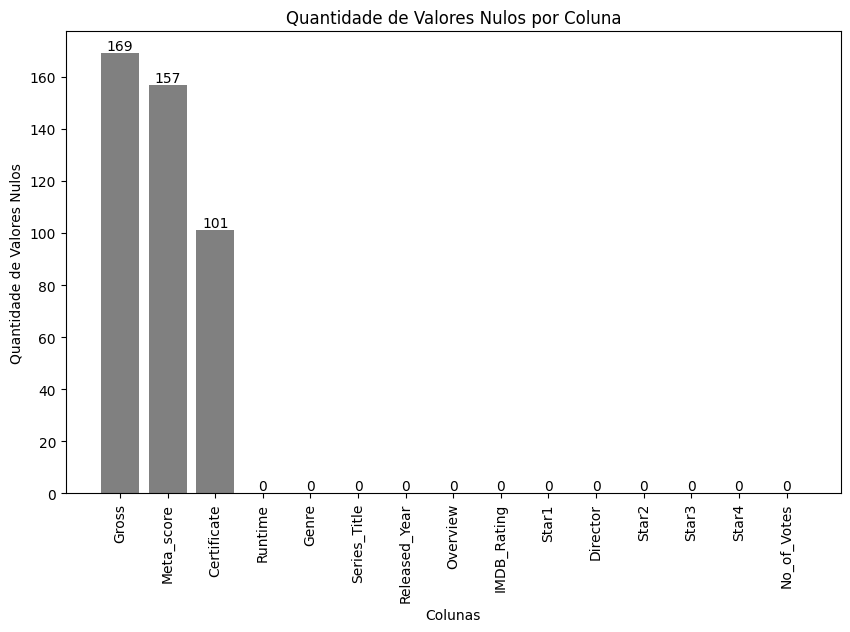

In [ ]:
# A função .shape retorna uma tupla: o número de linhas e o número de colunas
print(f"O dataset tem {df_indicium_imdb.shape[0]} linhas e {df_indicium_imdb.shape[1]} colunas.")

# Verificamos os tipos de dados de cada coluna com o método .dtypes
print("\nTipos de dados das colunas:")
print(df_indicium_imdb.dtypes)

# A função .isnull().sum() retorna a quantidade de valores ausentes por coluna, o que é essencial para saber se precisamos tratar esses dados
print("\nValores ausentes por coluna:")
print(df_indicium_imdb.isnull().sum())

# Gráfico com a representação dos valores ausentes por coluna, ordenado do maior para o menor
missing_values = df_indicium_imdb.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(missing_values.index, missing_values.values, color='gray')
plt.title('Quantidade de Valores Nulos por Coluna')
plt.xlabel('Colunas')
plt.ylabel('Quantidade de Valores Nulos')

# Adicionar a quantidade de valores ausentes no topo das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black')

plt.xticks(rotation=90)
plt.show()

O processo de explorar os dados  no início  serve para garantir que estamos lidando com informações bem estruturadas. Saber o tamanho do dataset, e como cada variável está representada e onde podemos ter problemas com dados ausentes. São etapas importantes para preparar a análise de dados.

*   Nesta base percebemos que há valores nulos em uma 3 colunas/variaveis, a variavel Gross, valores do faturamento tem grande importância para nossa analise e seria inviável remover estas linhas pelo fato de  representarem um pouco mais de 159% dos dados do dataset.
*   O mais viável é  preencher estes valores com a mediana por gênero de filme para uma analalise mais assertiva.


In [ ]:
# o método .info() usado para obter informações gerais sobre o dataset
df_indicium_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


In [ ]:
# lista as primeiras linhas do dataset
df_indicium_imdb.head(4)


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## **2. Questões sobre a Análise premilinar:**



# a . Qual filme você recomendaria para uma pessoa que você não conhece?

     




Verificaria três filmes com nota acima de 8 e com maior número de votos e sugeriria esta lista como escolha, assim haveria a possibilidade de haver gêneros diferentes e mais opções para uma escolha mais assertiva de acordo com o gosto da pessoa.

In [ ]:
# Filtrar apenas os filmes com nota > 8.0
thebest = df_indicium_imdb[
    (df_indicium_imdb["IMDB_Rating"] > 8)
]

# Ordenar por número de votos (do maior para o menor)
thebest = thebest.sort_values(by="No_of_Votes", ascending=False)

# Exibir os 3  "melhores"
thebest[["Series_Title", "Genre", "Released_Year", "IMDB_Rating", "No_of_Votes"]].head(3)


,Series_Title,Genre,Released_Year,IMDB_Rating,No_of_Votes
2,The Dark Knight,"Action, Crime, Drama",2008,9.0,2303232
8,Inception,"Action, Adventure, Sci-Fi",2010,8.8,2067042
9,Fight Club,Drama,1999,8.8,1854740


# b. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?


A escolha de diretores e atores, numero de votos e valores do faturamento.


# c. Quais insights podem ser tirados com a coluna Overview?

* Verificar as palavras que aparecem muitas vezes remetem  ao gênero do filme. Exemplo war, love, life, killer/dead, tem grande possibilidade de remeter respectivamente em gêneros ação, romance,biografia, terror.

* Através da emoção/sentimento expressado pelas palavras na sinopse  do filme, é possivel inferir o genero do fime, por exemplo palavras com contexto negativo, como morte, assassinato, destruição remetem a drama, terror, palavras que remetem ao contexto positivo como amor e amizade, remete ao gênero de romance,comédia palavras com contexto de ação geralmente remetem a aventura.

  # É possível inferir o gênero do filme a partir dessa coluna?

  Sim, uma das formas é treinar um modelo.

# 3 . Explique como você faria a previsão da nota do imdb a partir dos dados.

**Quais variáveis e/ou suas transformações você utilizou e por quê?**


Escolheria as variaveis mais importantes:

  Runtime – Tempo de duração

  Meta_score - Média ponderada de todas as críticas

  No_of_Votes - Número de votos

  Gross - Faturamento

  Certificate - Classificação etária

  Genre - Gênero

  Director – Diretor

  Stars - Atriz/ator
  
  Overview - Sinopse do Filme

  Transformações:
  log-transform - No_of_Votes Gross

   one-hot encoding:
   Genre - Gênero, Certificate - Classificação etária
   
   TF-IDF:  Overview



**Qual tipo de problema estamos resolvendo (regressão, classificação)?**

Regressão.

**Qual modelo melhor se aproxima dos dados e quais seus prós e contras?**

O modelo que atende melhor neste caso é o Random forest pois captura relações não lineares e lida bem com variáveis numéricas e categóricas, por outro lado é mais lento no caso de datasets grandes, mas neste caso faz um bom trabalho só não é tão fácil a interpretação como é a  regressão linear.

**Qual medida de performance do modelo foi escolhida e por quê?**

As medidas escolhidas foram: RMSE-Root Mean Squared Error e  R² -Coeficiente de Determinação.

  RMSE-esta medida foi escolhida pois mostra  como o modelo está em relação as notas reais .

  R² - esta medida foi escolhida pois mostra se o modelo realmente captura a tendência geral das notas ou se é algo empiríco.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Remove linhas com valores ausentes nas colunas que vamos usar
df_modelo = df_modelo.dropna(subset=['Runtime', 'Meta_score', 'No_of_Votes', 'Gross', 'Genre', 'IMDB_Rating'])

#Normalização das colunas problemáticas
#Runtime: remove " min" e converte para inteiro
df_modelo['Runtime'] = (
    df_modelo['Runtime']
    .astype(str)                  # garante string
    .str.replace(' min', '', regex=False)
    .str.strip()                  # remove espaços extras
    .replace('', np.nan)          # caso tenha vazio
    .astype(float)                # converte para número
    .astype(int)                  # inteiro final
)

# Gross: remove vírgulas e converte para float
df_modelo['Gross'] = (
    df_modelo['Gross']
    .astype(str)                  # garante string
    .str.replace(',', '', regex=False)
    .str.strip()
    .replace('', np.nan)
    .astype(float)
)

#Separa variáveis numéricas e categóricas
X_num = df_modelo[['Runtime', 'Meta_score', 'No_of_Votes', 'Gross']]
X_cat = df_modelo[['Genre']]

# One-hot encoding para 'Genre'
encoder = OneHotEncoder(drop='first')
X_cat_encoded = encoder.fit_transform(X_cat)

#Combina numéricas + categóricas
X = np.hstack([X_num.values, X_cat_encoded.toarray()])
y = df_modelo['IMDB_Rating'].values

#Divide treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Treina o modelo
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

#Faz previsões
y_pred = model.predict(X_test)

#Avalia desempenho
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

#Exibe exemplos reais vs previstos
exemplos = pd.DataFrame({
    "IMDB Real": y_test[:5],
    "IMDB Previsto": y_pred[:5]
})
print("\n Exemplos de previsão:\n", exemplos)


RMSE: 0.19999669163930425
R²: 0.5258612035679802

 Exemplos de previsão:
    IMDB Real  IMDB Previsto
0        7.7         7.7735
1        7.9         7.7540
2        8.2         8.3165
3        8.0         7.8400
4        8.0         7.6635


Para se ter uma ideia da precisão do modelo usado, vamos exibir o modelo usando um grafico de dispersão

# Gráfico de Dispersão

Exibe a qualidade do modelo, o quanto o modelo acertou em sua previsão.

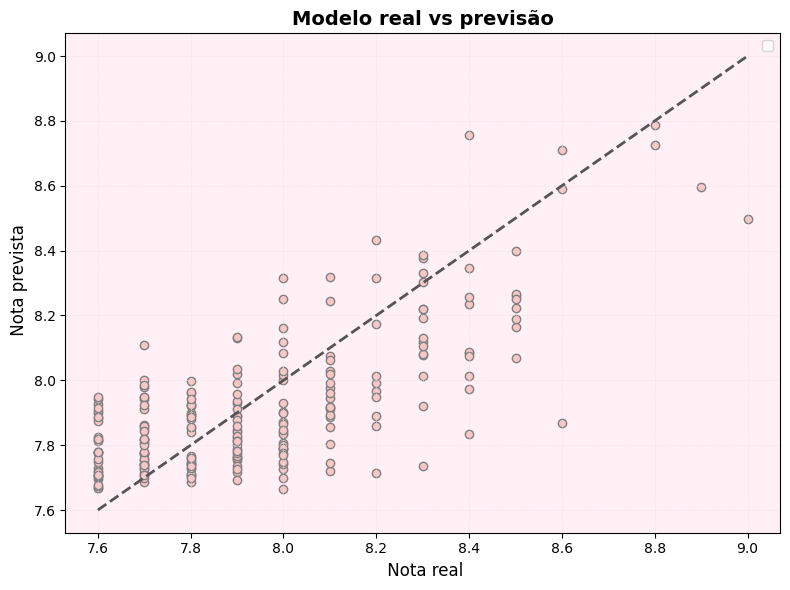

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.gca().set_facecolor("#fff0f5")

plt.scatter(y_test, y_pred, color="#f7c6c7", edgecolors='gray')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color="#555555", linestyle='--', linewidth=2)

plt.xlabel(" Nota real", fontsize=12)
plt.ylabel(" Nota prevista", fontsize=12)
plt.title("Modelo real vs previsão", fontsize=14, weight='bold')
plt.grid(True, linestyle=':', linewidth=0.6, color="#f2dede")
plt.legend()
plt.tight_layout()
plt.show()

1- Modelo acerta a previsão = o ponto cai em cima dessa linha.

2- Modelo erra:
*   Se a previsão >  a real, o ponto fica acima da linha.
*   Se a previsão < a real, o ponto fica abaixo da linha.

OBS: Quanto mais longe da linha, maior o erro do modelo em relação ao original.

## 4. Supondo um filme com as seguintes características:
{'Título_da_série': 'Um Sonho de Liberdade', 'Ano_de_lançamento': '1994', 'Certificado': 'A', 'Duração': '142 min', 'Gênero': 'Drama', 'Visão geral': 'Dois homens presos se unem ao longo de vários anos, encontrando consolo e, por fim, redenção por meio de atos de decência.', 'Meta_pontuação': 80,0, 'Diretor': 'Frank Darabont', 'Estrela 1': 'Tim Robbins', 'Estrela 2': 'Morgan Freeman', 'Estrela 3': 'Bob Gunton', 'Estrela 4': 'William Sadler', 'Número_de_Votos': 2343110, 'Bruto': '28.341.469'}

## Qual seria a nota do IMDB?

In [ ]:
#Previsão para o filme_sugerido
filme_sugerido = {
    'Título_da_série': 'Um Sonho de Liberdade',
    'Ano_de_lançamento': '1994',
    'Certificado': 'A',
    'Duração': '142 min',
    'Gênero': 'Drama',
    'Visão geral': 'Dois homens presos se unem ao longo de vários anos...',
    'Meta_pontuação': 80.0,
    'Diretor': 'Frank Darabont',
    'Estrela 1': 'Tim Robbins',
    'Estrela 2': 'Morgan Freeman',
    'Estrela 3': 'Bob Gunton',
    'Estrela 4': 'William Sadler',
    'Número_de_Votos': 2343110,
    'Bruto': '28.341.469'
}

# Preparar os dados do filme_sugerido
runtime = int(filme_sugerido['Duração'].replace(' min', ''))
meta_score = float(filme_sugerido['Meta_pontuação'])
votes = int(filme_sugerido['Número_de_Votos'])
gross = float(filme_sugerido['Bruto'].replace('.', ''))  # transforma em número
genre = filme_sugerido['Gênero']

# Criar DataFrame de entrada
df_filme_sugerido = pd.DataFrame({
    'Runtime': [runtime],
    'Meta_score': [meta_score],
    'No_of_Votes': [votes],
    'Gross': [gross],
    'Genre': [genre]
})

#Separar numéricas e categóricas
X_num_novo = df_filme_sugerido[['Runtime', 'Meta_score', 'No_of_Votes', 'Gross']]
X_cat_novo = encoder.transform(df_filme_sugerido[['Genre']])

#Combinar numéricas + categóricas
X_novo = np.hstack([X_num_novo.values, X_cat_novo.toarray()])

#Fazer previsão
nota_prevista = model.predict(X_novo)[0]
print(f"\n Nota prevista para '{filme_sugerido['Título_da_série']}': {nota_prevista:.2f}")



 Nota prevista para 'Um Sonho de Liberdade': 8.79


Foi utilizado o mesmo pipeline da questão anterior.

Adiciona a previsão para o filme sugerido

Converte as variáveis Gross, Runtime.

Usa o mesmo OneHotEncoder treinado com os dados anteriores.

***Salva e baixa arquivos .pkl***

In [54]:
import joblib
from google.colab import files

# Salvar modelo e encoder no diretório do Colab
joblib.dump(model, "modelo_imdb.pkl")
joblib.dump(encoder, "encoder_genero.pkl")

# Fazer download para sua máquina
files.download("modelo_imdb.pkl")
files.download("encoder_genero.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>